<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n20.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.733878,34.385756,47.015757,62.909044,4.620230,227.664665,129.853451,97.811214
1,0.0,1.0,93.234991,81.858459,72.013938,64.924996,208.238166,530.270549,369.338544,160.932006
2,0.0,2.0,40.727080,65.867775,94.354926,79.354453,74.625271,364.929506,431.807565,-66.878059
3,0.0,3.0,28.286734,31.072088,84.843657,73.856125,-250.031427,-21.972823,313.323679,-335.296502
4,0.0,4.0,38.848645,75.571309,89.090359,91.129292,453.533193,758.172798,400.388769,357.784029
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.344411,68.503387,91.964551,49.713744,-232.599332,37.926761,129.707663,-91.780902
19996,999.0,16.0,26.057397,22.319830,21.469100,91.859817,15.384099,187.090244,-44.920455,232.010699
19997,999.0,17.0,62.359250,98.327183,39.300657,61.828624,1017.071261,1288.886974,635.449120,653.437854
19998,999.0,18.0,51.397370,72.717604,66.280758,32.089062,170.357909,402.842703,71.929226,330.913477


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.733878,34.385756,47.015757,62.909044,4.620230,227.664665,129.853451,97.811214
1,0.0,1.0,93.234991,81.858459,72.013938,64.924996,208.238166,530.270549,369.338544,160.932006
2,0.0,2.0,40.727080,65.867775,94.354926,79.354453,74.625271,364.929506,431.807565,-66.878059
3,0.0,3.0,28.286734,31.072088,84.843657,73.856125,-250.031427,-21.972823,313.323679,-335.296502
4,0.0,4.0,38.848645,75.571309,89.090359,91.129292,453.533193,758.172798,400.388769,357.784029
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.344411,68.503387,91.964551,49.713744,-232.599332,37.926761,129.707663,-91.780902
19996,999.0,16.0,26.057397,22.319830,21.469100,91.859817,15.384099,187.090244,-44.920455,232.010699
19997,999.0,17.0,62.359250,98.327183,39.300657,61.828624,1017.071261,1288.886974,635.449120,653.437854
19998,999.0,18.0,51.397370,72.717604,66.280758,32.089062,170.357909,402.842703,71.929226,330.913477


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    68.733878  34.385756  47.015757  62.909044     4.620230   
      1.0    93.234991  81.858459  72.013938  64.924996   208.238166   
      2.0    40.727080  65.867775  94.354926  79.354453    74.625271   
      3.0    28.286734  31.072088  84.843657  73.856125  -250.031427   
      4.0    38.848645  75.571309  89.090359  91.129292   453.533193   
...                ...        ...        ...        ...          ...   
999.0 15.0   50.344411  68.503387  91.964551  49.713744  -232.599332   
      16.0   26.057397  22.319830  21.469100  91.859817    15.384099   
      17.0   62.359250  98.327183  39.300657  61.828624  1017.071261   
      18.0   51.397370  72.717604  66.280758  32.089062   170.357909   
      19.0   38.612383  75.863823  63.302923  82.239946  -336.745959   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     227.664665  129.853451   97.811214  
      1.0     530.270549  369.338544  160.932006  
      2.0     364.929506  431.807565  -66.878059  
      3.0     -21.972823  313.323679 -335.296502  
      4.0     758.172798  400.388769  357.784029  
...                  ...         ...         ...  
999.0 15.0     37.926761  129.707663  -91.780902  
      16.0    187.090244  -44.920455  232.010699  
      17.0   1288.886974  635.449120  653.437854  
      18.0    402.842703   71.929226  330.913477  
      19.0    -66.726884  351.285093 -418.011976  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    68.733878  34.385756  47.015757  62.909044     4.620230   
      1.0    93.234991  81.858459  72.013938  64.924996   208.238166   
      2.0    40.727080  65.867775  94.354926  79.354453    74.625271   
      3.0    28.286734  31.072088  84.843657  73.856125  -250.031427   
      4.0    38.848645  75.571309  89.090359  91.129292   453.533193   
...                ...        ...        ...        ...          ...   
999.0 15.0   50.344411  68.503387  91.964551  49.713744  -232.599332   
      16.0   26.057397  22.319830  21.469100  91.859817    15.384099   
      17.0   62.359250  98.327183  39.300657  61.828624  1017.071261   
      18.0   51.397370  72.717604  66.280758  32.089062   170.357909   
      19.0   38.612383  75.863823  63.302923  82.239946  -336.745959   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     227.664665  129.853451   97.811214  
      1.0     530.270549  369.338544  160.932006  
      2.0     364.929506  431.807565  -66.878059  
      3.0     -21.972823  313.323679 -335.296502  
      4.0     758.172798  400.388769  357.784029  
...                  ...         ...         ...  
999.0 15.0     37.926761  129.707663  -91.780902  
      16.0    187.090244  -44.920455  232.010699  
      17.0   1288.886974  635.449120  653.437854  
      18.0    402.842703   71.929226  330.913477  
      19.0    -66.726884  351.285093 -418.011976  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.733878,34.385756,47.015757,62.909044,4.620230,227.664665,129.853451,97.811214
1,0.0,1.0,93.234991,81.858459,72.013938,64.924996,208.238166,530.270549,369.338544,160.932006
2,0.0,2.0,40.727080,65.867775,94.354926,79.354453,74.625271,364.929506,431.807565,-66.878059
3,0.0,3.0,28.286734,31.072088,84.843657,73.856125,-250.031427,-21.972823,313.323679,-335.296502
4,0.0,4.0,38.848645,75.571309,89.090359,91.129292,453.533193,758.172798,400.388769,357.784029
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,50.344411,68.503387,91.964551,49.713744,-232.599332,37.926761,129.707663,-91.780902
19996,999.0,16.0,26.057397,22.319830,21.469100,91.859817,15.384099,187.090244,-44.920455,232.010699
19997,999.0,17.0,62.359250,98.327183,39.300657,61.828624,1017.071261,1288.886974,635.449120,653.437854
19998,999.0,18.0,51.397370,72.717604,66.280758,32.089062,170.357909,402.842703,71.929226,330.913477


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    68.733878  34.385756  47.015757  62.909044     4.620230   
      1.0    93.234991  81.858459  72.013938  64.924996   208.238166   
      2.0    40.727080  65.867775  94.354926  79.354453    74.625271   
      3.0    28.286734  31.072088  84.843657  73.856125  -250.031427   
      4.0    38.848645  75.571309  89.090359  91.129292   453.533193   
...                ...        ...        ...        ...          ...   
999.0 15.0   50.344411  68.503387  91.964551  49.713744  -232.599332   
      16.0   26.057397  22.319830  21.469100  91.859817    15.384099   
      17.0   62.359250  98.327183  39.300657  61.828624  1017.071261   
      18.0   51.397370  72.717604  66.280758  32.089062   170.357909   
      19.0   38.612383  75.863823  63.302923  82.239946  -336.745959   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     227.664665  129.853451   97.811214  
      1.0     530.270549  369.338544  160.932006  
      2.0     364.929506  431.807565  -66.878059  
      3.0     -21.972823  313.323679 -335.296502  
      4.0     758.172798  400.388769  357.784029  
...                  ...         ...         ...  
999.0 15.0     37.926761  129.707663  -91.780902  
      16.0    187.090244  -44.920455  232.010699  
      17.0   1288.886974  635.449120  653.437854  
      18.0    402.842703   71.929226  330.913477  
      19.0    -66.726884  351.285093 -418.011976  

[20000 rows x 8 columns]

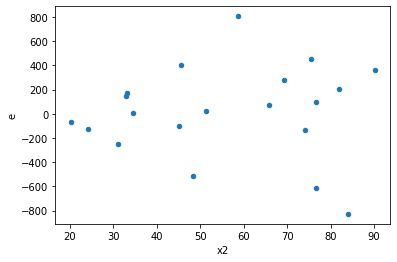

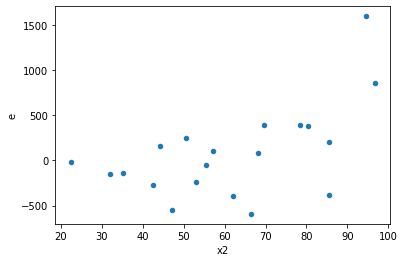

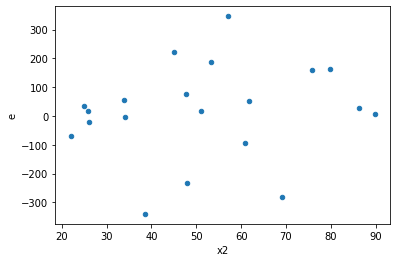

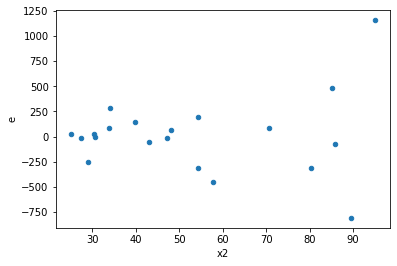

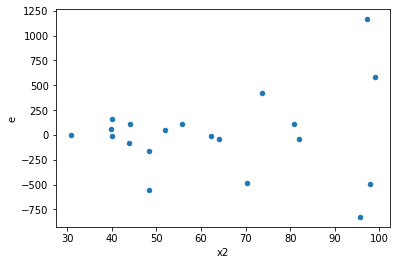

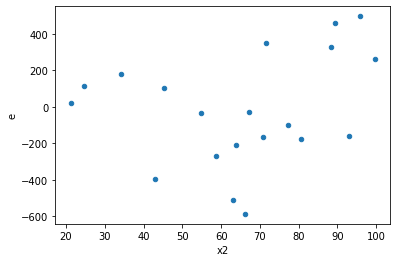

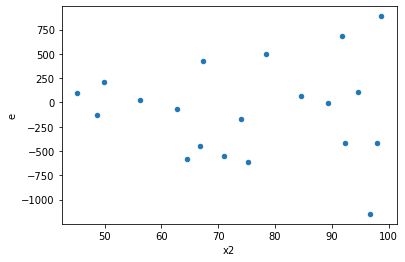

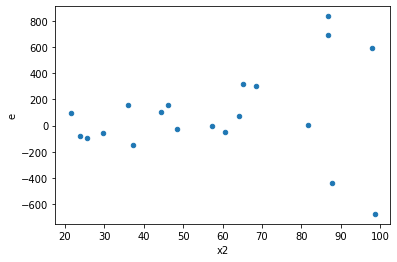

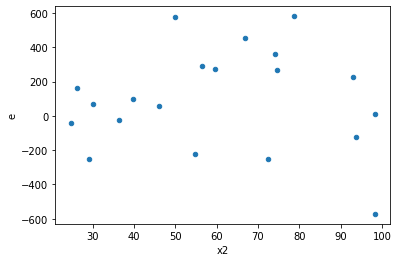

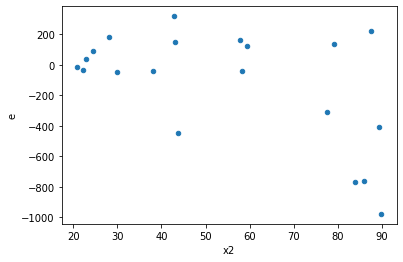

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,342539.07830647123,894193.9553461763,85634.76957661781,223548.48883654407,2.61048742166036,0.37528836850238223,0.8123558157488089,0.18764418425119112,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,187503.5189623573,1056556.7527170829,46875.87974058933,264139.1881792707,5.634863593835774,0.12260223836051787,0.9386988808197411,0.061301119180258934,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,47283.520488321024,77459.76165201288,11820.880122080256,19364.94041300322,1.6381978510069983,0.6442179396097361,0.677891030195132,0.32210896980486803,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,41047.49090974948,1889287.0944418185,10261.87272743737,472321.77361045463,46.026859439369055,0.0026745982364979604,0.998662700881751,0.0013372991182489802,Reject001=0 : Heteroscedasticity
5.0,4.0,4.0,85717.12860262928,399923.9085149553,21429.28215065732,99980.97712873883,4.665624187773925,0.1649253468733356,0.9175373265633322,0.0824626734366678,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,252005.67164606752,461277.4014626334,63001.41791151688,115319.35036565835,1.8304246823082622,0.5725390746573518,0.7137304626713241,0.2862695373286759,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,132651.7390691613,865639.2740649079,33162.934767290324,216409.81851622698,6.525653415019198,0.09655584604434342,0.9517220769778283,0.04827792302217171,Reject001=1 : Homoscedasticity
10.0,4.0,4.0,556242.460143728,1599886.9649800537,139060.615035932,399971.7412450134,2.876240272212692,0.33064847363005523,0.8346757631849724,0.16532423681502761,Reject001=1 : Homoscedasticity
11.0,4.0,4.0,77932.20697165918,597754.7655205512,19483.051742914795,149438.6913801378,7.670189113698919,0.07367950619726815,0.9631602469013659,0.036839753098634076,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,342539.07830647123,894193.9553461763,85634.76957661781,223548.48883654407,2.61048742166036,0.37528836850238223,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,187503.5189623573,1056556.7527170829,46875.87974058933,264139.1881792707,5.634863593835774,0.12260223836051787,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,47283.520488321024,77459.76165201288,11820.880122080256,19364.94041300322,1.6381978510069983,0.6442179396097361,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,41047.49090974948,1889287.0944418185,10261.87272743737,472321.77361045463,46.026859439369055,0.0026745982364979604,Reject001=0 : Heteroscedasticity
4.0,4.0,4.0,309761.78686168726,27750.000749288512,77440.44671542181,6937.500187322128,0.08958497118199817,0.038336913347964165,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,85717.12860262928,399923.9085149553,21429.28215065732,99980.97712873883,4.665624187773925,0.1649253468733356,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,252005.67164606752,461277.4014626334,63001.41791151688,115319.35036565835,1.8304246823082622,0.5725390746573518,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,132651.7390691613,865639.2740649079,33162.934767290324,216409.81851622698,6.525653415019198,0.09655584604434342,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,316394.415350864,107239.337661919,79098.603837716,26809.83441547975,0.3389419422684704,0.31959814710336387,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      905
Reject001=0 : Heteroscedasticity     95
Name: Result_test, dtype: int64